# Clustering

## Algorithms and Metrics

The objective of this lab is to compare the performance of two clustering algorithms, K-means and the Gaussian Mixture Model (GMM).

We use the [Iris dataset](https://fr.wikipedia.org/wiki/Iris_de_Fisher).

Learning is **unsupervised**: we use the labels only to test the quality of the clustering.

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from sklearn import datasets

In [4]:
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics.cluster import contingency_matrix

## Data

In [5]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target
feature_names = iris.feature_names
label_names = list(iris.target_names)

In [6]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
label_names

['setosa', 'versicolor', 'virginica']

In [8]:
np.mean(X, axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [9]:
def show_data(X, y, features=[0, 1], feature_names=feature_names):
    '''Display the samples in 2D'''
    for label in set(y):
        plt.scatter(X[y == label, features[0]], X[y == label, features[1]])
    plt.xlabel(feature_names[features[0]])
    plt.ylabel(feature_names[features[1]])
    plt.axis('equal')
    plt.show()

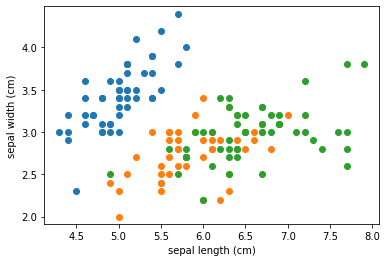

In [10]:
show_data(X, y, [0, 1])

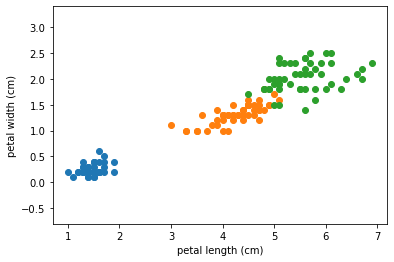

In [11]:
show_data(X, y, [2, 3])

## K-means

In [12]:
class KMeans:
    '''K-means algorithm
    
    Parameters
    ----------
    n_clusters: int, default: 8
        Number of clusters.
    
    n_init: int, default: 10
        Number of instances of k-means, each with different initial centers. 
        The output is that of the best instance.
    
    n_iter: int, default: 300
        Number of iterations for each instance of k-means.
        
    algorithm: "random" or "++", default:"++"
        Algorithm for initializing the centers; "++" corresponds to k-means++.
    
    seed: int, default: 0
        Seed for the random generation of initial centers.
        
    verbose: boolean, optional
        Verbose mode.
    
    Attributes
    ----------
    labels_: array, shape(n_samples,)
        Label of each sample (cluster index).
        
    centers_: array, shape(n_clusters, n_features)
        Cluster centers.
        
    inertias_: array, shape(n_clusters,)
        Cluster inertias (sum of square distances).
    '''

    def __init__(self, n_clusters=8, n_init=10, n_iter=300, algorithm='++', seed=0, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.algorithm = algorithm
        self.seed = seed
        self.verbose = verbose
        self.labels_ = None
        self.centers_ = None
        self.inertias_ = None
       
    def fit(self, X):
        '''Cluster data using K-Means
    
        Parameters
        ----------
        X: array, shape(n_samples, n_features)
            Data to cluster.
        '''        
        n_samples = X.shape[0]
        
        def init_centers(self, X):
            if self.algorithm == 'random':
                # random centers 
                samples = np.random.choice(n_samples, size=self.n_clusters)
                centers = X[samples]
            else:
                # k-means++
                centers = []
                centers.append(X[np.random.choice(n_samples)])
                distances = np.full(n_samples, np.inf)
                for j in range(1, self.n_clusters):
                    distances = np.minimum(np.linalg.norm(X - centers[-1], axis=1), distances)
                    # select new center in proportion to square distance
                    p = np.square(distances) / np.sum(np.square(distances))
                    sample = np.random.choice(n_samples, p=p)
                    centers.append(X[sample])
            return np.array(centers)
        
        def compute_centers(self, X, labels):
            centers = []
            for j in range(self.n_clusters):
                index = np.argwhere(labels == j).ravel()
                if len(index):
                    centers.append(np.mean(X[index], axis=0))
                else:
                    # reinit center in case of empty cluster
                    centers.append(X[np.random.choice(n_samples)])
            return np.array(centers)

        def compute_distances(self, X, centers):
            distances = [np.linalg.norm(X - centers[j], axis=1) for j in range(self.n_clusters)]
            return np.array(distances)
            
        def compute_inertias(self, X, labels, centers):
            inertias = []
            for j in range(self.n_clusters):
                index = np.argwhere(labels == j).ravel()
                inertias.append(np.sum(np.square(np.linalg.norm(X[index] - centers[j], axis=1))))
            return np.array(inertias)
        
        def single_run(self, X):
            centers = init_centers(self, X)
            for i in range(self.n_iter):
                centers_old = centers.copy()
                distances = compute_distances(self, X, centers)
                labels = np.argmin(distances, axis=0)  
                centers = compute_centers(self, X, labels)
                if np.array_equal(centers, centers_old):
                    break
            inertias = compute_inertias(self, X, centers, labels)
            return labels, centers, inertias
            
        np.random.seed(self.seed)
        best_inertia = None
        # select the best instance of k-means
        for i in range(self.n_init):
            if self.verbose:
                print("Instance ",i)
            labels, centers, inertias = single_run(self, X)
            inertia = np.sum(inertias)
            if best_inertia is None or inertia < best_inertia:
                best_labels = labels.copy()
                best_centers = centers.copy()
                best_inertias = inertias.copy()
                best_inertia = inertia

        self.labels_ = best_labels
        self.centers_ = best_centers
        self.inertias_ = best_inertias

## To do

* Apply KMeans for $k=3$ and display the clusters.
* Display the silhouette distributions of the clusters.<br>
What is the "best" cluster?
* Display the contingency matrix of the clustering.<br>
To what species corresponds the "best" cluster you have identified?
* Compute the ARI and the AMI of the clustering.
* Plot these metrics with $k$ increasing from 1 to 10.
* Compare the results to those obtained with the KMeans of scikit-learn.<br>
You might use ARI and AMI to check the consistency of both algorithms.

In [13]:
km = KMeans(n_clusters=3)

In [14]:
km.fit(X)

In [15]:
y_pred = km.labels_

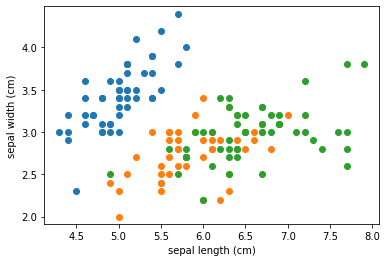

In [16]:
show_data(X, y, [0, 1])

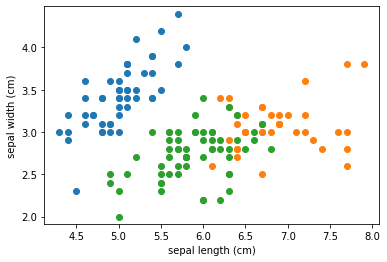

In [17]:
show_data(X, y_pred, [0, 1])

In [18]:
silhouettes = silhouette_samples(X, y_pred)

In [19]:
df_silhouettes = pd.DataFrame({"Silhouette": silhouettes, "Cluster": y_pred})

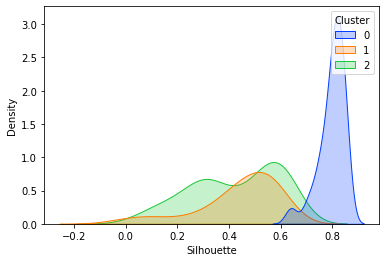

In [20]:
sns.kdeplot(data=df_silhouettes, x="Silhouette", hue="Cluster", fill=True, palette="bright");

In [21]:
df_silhouettes.groupby("Cluster").mean()

,Silhouette
Cluster,
0,0.797604
1,0.436842
2,0.422323


In [22]:
np.mean(silhouettes)

0.5511916046195917

In [23]:
# direct computation
silhouette_score(X, y_pred)

0.5511916046195917

In [24]:
best_cluster = int(df_silhouettes.groupby("Cluster").mean().idxmax())

In [25]:
best_cluster

0

In [26]:
contingency = contingency_matrix(y, y_pred)

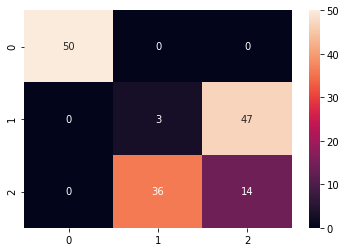

In [27]:
sns.heatmap(contingency, annot=True);

In [28]:
label_names[np.argmax(contingency[:,best_cluster])]

'setosa'

## Gaussian mixture

In [29]:
class GMM:
    '''EM algorithm for the Gaussian mixture model
    
    Parameters
    ----------
    n_clusters: int, default: 8
        Number of clusters.
    
    n_init : int, default: 10
        Number of instances of the algorithm, each with different initial cluster centers. 
        The output is that of the best instance (in terms of likelihood).
    
    n_iter: int, default: 300
        Maximum number of iterations for each instance of the algorithm.
        
    algorithm: "random" or "k-means++", default:"k-means++"
        Algorithm for initializing the means.
    
    seed: int, default: None
        Seed for the random generation of cluster centers.
        
    verbose: boolean, default: True
        Verbose mode.
    
    Attributes
    ----------
    labels_: array, shape(n_samples,)
        Label of each sample (cluster index).

    label_probs_: array, shape(n_samples,n_clusters)
        Probability distribution of labels for each sample.
        
    centers_ : array, shape(n_clusters,n_features)
        Cluster centers.
    '''

    def __init__(self, n_clusters=8, n_init=10, n_iter=300, algorithm='k-means++', seed=0, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.algorithm = algorithm
        self.seed = seed
        self.verbose = verbose
        self.labels_ = None
        self.label_probs_ = None
        self.centers_ = None
       
    def fit(self, X):
        '''Cluster data X using EM for the Gaussian mixture model
    
        Parameters
        ----------
        X: array, shape(n_samples,n_features)
            Data to cluster.
        '''        
        n_samples, n_features = X.shape
        
        def init_parameters(self, X):
            # choose initial centers
            if self.algorithm == 'random':
                # random centers
                samples = np.random.choice(n_samples, size = self.n_clusters)
                centers = X[samples]
            else:
                # k-means++
                centers = []
                centers.append(X[np.random.choice(n_samples)])
                distances = np.full(n_samples, np.inf)
                for j in range(1,self.n_clusters):
                    distances = np.minimum(np.linalg.norm(X - centers[-1], axis=1), distances)
                    # select new center in proportion to square distance
                    p = np.square(distances) / np.sum(np.square(distances))
                    sample = np.random.choice(n_samples, p=p)
                    centers.append(X[sample])
                
            # estimate the parameters from the induced clusters
            distances = []
            for j in range(self.n_clusters):
                distances.append(np.linalg.norm(X - centers[j], axis=1))
            labels = np.argmin(np.array(distances), axis=0)
            means = []
            covariances = []
            cluster_weights = []
            for j in range(self.n_clusters):
                index = np.argwhere(labels == j).ravel()
                cluster_weights.append(len(index))
                if len(index):
                    means.append(np.mean(X[index], axis=0))
                    covariances.append(np.cov(X[index].T))    
                else:
                    # empty cluster
                    means.append(centers[j])
                    covariances.append(np.eye(n_features))
            return np.array(means), np.array(covariances), np.array(cluster_weights)

        def compute_label_probs(self, X, means, covariances, cluster_weights):
            label_probs = np.zeros((n_samples,self.n_clusters))
            for j in range(self.n_clusters):
                cov = covariances[j]
                try:
                    inv_cov = np.linalg.inv(cov)
                    square_distances = ((X - means[j]).dot(inv_cov) * (X - means[j])).sum(axis = 1) 
                    label_probs[:,j] = np.exp(-square_distances / 2) / np.sqrt(np.linalg.det(cov))
                except:
                    if self.verbose:
                        print("Warning: Singular covariance matrix")
                    square_distances = np.square(X - means[j]).sum(axis = 1) 
                    label_probs[:,j] = np.exp(-square_distances / 2) 
            label_probs = label_probs * cluster_weights
            label_probs = (label_probs.T / label_probs.sum(axis = 1)).T
            return label_probs    
                        
        def compute_parameters(self, X, label_probs):
            cluster_weights = label_probs.sum(axis=0)
            means = (X.T.dot(label_probs) / cluster_weights).T
            covariances = []
            for j in range(self.n_clusters):
                Y = (X - means[j]).T * label_probs[:,j]
                covariances.append(Y.dot(X - means[j]) / cluster_weights[j])
            return means, covariances, cluster_weights
        
        def compute_log_likelihood(self, X, means, covariances, cluster_weights):
            likelihoods = np.zeros((X.shape[0], self.n_clusters))
            cluster_probs = cluster_weights / cluster_weights.sum()
            for j in range(self.n_clusters):
                cov = covariances[j]
                try:
                    inv_cov = np.linalg.inv(cov)
                    square_distances = ((X - means[j]).dot(inv_cov) * (X - means[j])).sum(axis = 1) 
                    likelihoods[:,j] = cluster_probs[j] * np.exp(-square_distances / 2) / np.sqrt(np.linalg.det(cov))
                except:
                    if self.verbose:
                        print("Warning: Singular covariance matrix")
                    square_distances = np.square(X - means[j]).sum(axis = 1) 
                    likelihoods[:,j] = cluster_probs[j] * np.exp(-square_distances / 2) 
            return np.log(likelihoods.sum(axis = 1)).sum()
    
        def single_run(self, X):
            means, covariances, cluster_weights = init_parameters(self, X)
            labels = -np.ones(X.shape[0])
            for i in range(self.n_iter):    
                # Expectation
                label_probs = compute_label_probs(self, X, means, covariances, cluster_weights)              
                if np.array_equal(labels, label_probs.argmax(axis=1)):
                    break
                else:
                # Maximization
                    means, covariances, cluster_weights = compute_parameters(self, X, label_probs)
                    labels = label_probs.argmax(axis = 1)
            return label_probs, means, covariances, cluster_weights
            
        np.random.seed(self.seed)
        best_loglikelihood = None
        # select the best instance of EM
        for i in range(self.n_init):
            if self.verbose:
                print("Instance ",i)               
            label_probs, means, covariances, cluster_weights = single_run(self, X)
            loglikelihood = compute_log_likelihood(self, X, means, covariances, cluster_weights)
            if best_loglikelihood is None or loglikelihood > best_loglikelihood:
                best_loglikelihood = loglikelihood
                best_label_probs = label_probs
                best_labels = label_probs.argmax(axis = 1)
                best_centers = means
        self.label_probs_ = best_label_probs
        self.labels_ = best_labels
        self.centers_ = best_centers

## To do

* Apply the GMM clustering for $k=3$ and display the clusters.
* Compute the ARI and the AMI of the clustering.<br>
Compare with the clustering obtained with $k$-means.
* Plot these metrics with $k$ increasing from 1 to 10 and interpret the results.
* Compare the results to those obtained with the Gaussian Mixture of scikit-learn.
* Implement a new version of the algorithm with diagonal covariance matrices. Compare with previous results and conclude.<br>
**Hint:** Replace the covariance matrices by vectors of variances!

In [30]:
gmm = GMM(n_clusters=3)

In [31]:
gmm.fit(X)

In [32]:
y_pred = gmm.labels_

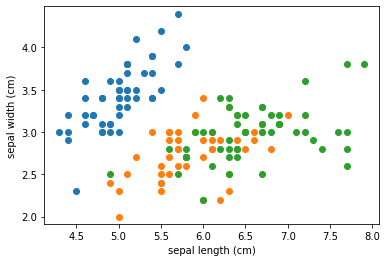

In [33]:
show_data(X, y, [0, 1])

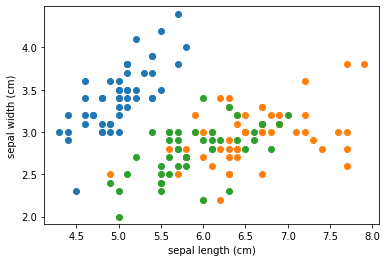

In [34]:
show_data(X, y_pred, [0, 1])

In [35]:
class GMD:
    '''EM algorithm for the Gaussian mixture model with diagonal covariance matrices.
    
    Parameters
    ----------
    n_clusters: int, default: 8
        Number of clusters.
    
    n_init : int, default: 10
        Number of instances of the algorithm, each with different initial cluster centers. 
        The output is that of the best instance (in terms of likelihood).
    
    n_iter: int, default: 300
        Maximum number of iterations for each instance of the algorithm.
        
    algorithm: "random" or "k-means++", default:"k-means++"
        Algorithm for initializing the means.
    
    seed: int, default: None
        Seed for the random generation of cluster centers.
        
    verbose: boolean, default: True
        Verbose mode.
    
    Attributes
    ----------
    labels_: array, shape(n_samples,)
        Label of each sample (cluster index).

    label_probs_: array, shape(n_samples,n_clusters)
        Probability distribution of labels for each sample.
        
    centers_ : array, shape(n_clusters,n_features)
        Cluster centers.
    '''

    def __init__(self, n_clusters=8, n_init=10, n_iter=300, algorithm='k-means++', seed=None, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.algorithm = algorithm
        self.seed = seed
        self.verbose = verbose
        self.labels_ = None
        self.label_probs_ = None
        self.centers_ = None
       
    def fit(self, X):
        '''Cluster data X using EM for the Gaussian mixture model with diagonal covariance matrices.
    
        Parameters
        ----------
        X: array, shape(n_samples, n_features)
            Data to cluster.
        '''        
        # to be completed
